### Pergunta ao chatGPT:
_Me gere um csv de 20 linhas, e depois proponha 10 exericicios no pandas, escalando a dificuldade._

### Resposta do chatGPT:
10 Exercícios em Pandas:
1. Nível 1 (Básico):<br>
- Carregar o CSV: Importe o arquivo sales_data.csv e exiba as primeiras 5 linhas do DataFrame.<br>
- Resumo Estatístico: Obtenha um resumo estatístico das colunas Quantity, Price e Total.<br>
- Filtragem Simples: Filtre todas as vendas feitas na categoria Electronics.<br>
2. Nível 2 (Intermediário):<br>
- Vendas por Categoria: Calcule o total de vendas (Total) para cada categoria (Category).<br>
- Produtos Mais Vendidos: Identifique o produto mais vendido (com base na Quantity).<br>
- Filtrar por Data: Filtre as vendas feitas entre 2024-03-01 e 2024-04-01.<br>
3. Nível 3 (Avançado):<br>
- Média por Cidade: Calcule a média de vendas (Total) por cidade.<br>
- Produto Mais Lucrativo: Identifique o produto com o maior valor total de vendas (Total).<br>
- Agrupamento e Soma: Agrupe os dados por país (Country) e calcule a soma das colunas Quantity e Total.<br>
4. Nível 4 (Desafiante):<br>
- Análise Temporal: Crie uma nova coluna Month com base em OrderDate e analise o total de vendas (Total) para cada mês.<br>

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
# Carregar o CSV: Importe o arquivo sales_data.csv e exiba as primeiras 5 linhas do DataFrame.
df = pd.read_csv('exercicio_pandas_01.csv')
df.head()

,OrderID,CustomerID,OrderDate,Product,Category,Quantity,Price,Total,City,Country
0,1001,ABC001,2024-01-15,Laptop,Electronics,1,1200,1200,New York,USA
1,1002,ABC002,2024-01-17,Phone,Electronics,2,700,1400,Los Angeles,USA
2,1003,ABC003,2024-01-20,Headphones,Electronics,3,50,150,Chicago,USA
3,1004,ABC004,2024-02-01,Shoes,Fashion,1,100,100,Miami,USA
4,1005,ABC005,2024-02-05,Watch,Fashion,1,250,250,Seattle,USA


In [57]:
# Resumo Estatístico: Obtenha um resumo estatístico das colunas Quantity, Price e Total.
df[['Quantity','Price','Total']].describe()

,Quantity,Price,Total
count,20.00000,20.000000,20.000000
mean,1.60000,443.500000,535.500000
std,0.88258,397.297118,430.171019
min,1.00000,20.000000,60.000000
25%,1.00000,100.000000,200.000000
50%,1.00000,300.000000,350.000000
75%,2.00000,700.000000,800.000000
max,4.00000,1200.000000,1400.000000


In [58]:
# Filtragem Simples: Filtre todas as vendas feitas na categoria Electronics.
df[df['Category'] == 'Electronics']

,OrderID,CustomerID,OrderDate,Product,Category,Quantity,Price,Total,City,Country
0,1001,ABC001,2024-01-15,Laptop,Electronics,1,1200,1200,New York,USA
1,1002,ABC002,2024-01-17,Phone,Electronics,2,700,1400,Los Angeles,USA
2,1003,ABC003,2024-01-20,Headphones,Electronics,3,50,150,Chicago,USA
5,1006,ABC006,2024-02-10,Tablet,Electronics,2,400,800,San Francisco,USA
7,1008,ABC008,2024-03-01,Camera,Electronics,1,500,500,Atlanta,USA
8,1009,ABC009,2024-03-05,Laptop,Electronics,1,1200,1200,Dallas,USA
9,1010,ABC010,2024-03-10,Phone,Electronics,1,700,700,Houston,USA
12,1013,ABC013,2024-03-25,Smartwatch,Electronics,1,300,300,Miami,USA
13,1014,ABC014,2024-04-01,TV,Electronics,1,800,800,Chicago,USA
15,1016,ABC016,2024-04-10,Laptop,Electronics,1,1200,1200,Boston,USA


In [59]:
# Vendas por Categoria: Calcule o total de vendas (Total) para cada categoria (Category).
df.pivot_table(values='Total', index='Category', aggfunc='sum')

,Total
Category,
Electronics,8850
Fashion,1860


In [60]:
# Produtos Mais Vendidos: Identifique o produto mais vendido (com base na Quantity).
df.pivot_table(values='Quantity', index='Product', aggfunc='sum').sort_values(by='Quantity', ascending=False)

,Quantity
Product,
Headphones,7
Jacket,3
Laptop,3
Phone,3
Shoes,3
T-Shirt,3
Tablet,3
Jeans,2
Watch,2


In [61]:
# array de valores:
vendas_por_produto = df.pivot_table(values='Quantity', index='Product', aggfunc='sum').sort_values(by='Quantity', ascending=False)
labels = vendas_por_produto.index
vendas = vendas_por_produto['Quantity'].values

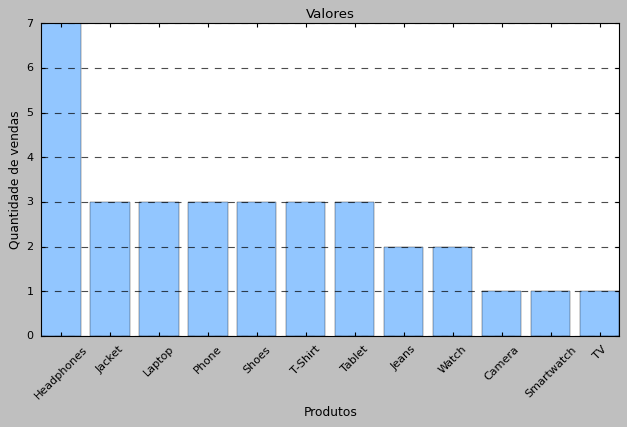

In [62]:
# plt.style.available
plt.style.use('seaborn-v0_8-pastel')

plt.bar(
    x=labels, 
    height=vendas,
    )

# Adicionar título e rótulos aos eixos
plt.title('Valores')
plt.xlabel('Produtos')
plt.ylabel('Quantidade de vendas')
plt.xticks(rotation=45)

# Exibir o gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()